# Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Load the image into a numpy array

In [30]:
path_to_jpg_file = "sample.jpg"
img = mpimg.imread(path_to_jpg_file)

In [32]:
img.shape

(1000, 1600, 3)

# Display the image

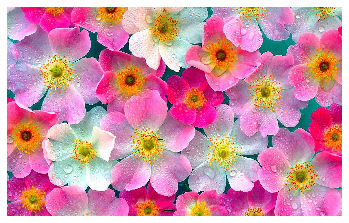

In [33]:
plt.imshow(img)
plt.axis('off')
plt.show()

# Reshape the image

In [34]:
pixels = img.reshape((-1,3))

In [35]:
pixels.shape

(1600000, 3)

In [36]:
pixels[0]

array([241, 220, 251], dtype=uint8)

# Implement KMeans from scratch

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import random
from copy import deepcopy


def equal_lists(list_a, list_b):
    """
    Compare list_a and list_b and return True if the two list contain the same values
    """
    if len(list_a) != len(list_b):
        return False
    first_set = set(map(tuple, list_a))
    secnd_set = set(map(tuple, list_b))
    return len(first_set.difference(secnd_set)) == 0
    
class KMeans:
    
    def __init__(self, k=2, max_iterations=200):
        
        self.k = k
        self.max_iterations = max_iterations

    def fit(self, points):
        """
        Compute clusters and their center points
        """
        self.centers = {} # a dictionary of cluster number and its center (mean) point

        # Choose k random points as the initial means
        random_points = random.sample(points, self.k)
        for i in range(self.k):
            self.centers[i] = random_points[i]

        for i in range(self.max_iterations): # max iterations

            print("iteration: ", i)
            
            self.clusters = {} # a dictionary of cluster number and points in that cluster

            for i in range(self.k): # initially, each cluster contains no point
                self.clusters[i] = []

            pre_clusters = deepcopy(self.clusters) # save clusters for comparing them with new clusters
            
            for point in points:
                # distances of point from each cluster center
                distances = [np.linalg.norm(point - self.centers[center]) for center in self.centers]
                # take cluster with minimum distance
                cluster = distances.index(min(distances))
                # append point to cluster
                self.clusters[cluster].append(point)

            # Update cluster centers
            for c in range(self.k):
                self.centers[c] = np.average(self.clusters[c], axis=0)
                
            # # check if clusters changed or not
            optimized = True
            for c in range(self.k):
                if equal_lists(self.clusters[c], pre_clusters[c]) == False:
                    optimized = False
                    break
                    
            if optimized: # clusters not changed, so stop the iterations
                break


    def predict_cluster(self, point):
        """
        Find cluster number of point
        """
        distances = [np.linalg.norm(point - self.centers[c]) for c in range(self.k)]
        return distances.index(min(distances))

    def predict_center(self, point):
        """
        Find center of the cluster that point belongs to
        """
        return self.centers[self.predict_cluster(point)]
        

def clustering_error(samples, k):
    print('k:', k)
    clf = KMeans(k, max_iterations=2)
    clf.fit(pixels)
    return np.sum(np.linalg.norm(point - clf.predict_center(point)) for point in samples)
    

# Clustering for k=2

In [74]:
n_clusters = 2
kmeans = KMeans(n_clusters).fit(pixels)

### Determine label of each pixel

In [75]:
c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = kmeans.labels_ 

In [76]:
c.head(3)

,R,G,B,label
0,241,220,251,0
1,229,208,239,0
2,217,196,227,0


### Map each pixel to its center

In [77]:
centers_map_R = {i:kmeans.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:kmeans.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:kmeans.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

In [78]:
c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,241,220,251,0,214.248633,166.662511,195.916668
1,229,208,239,0,214.248633,166.662511,195.916668
2,217,196,227,0,214.248633,166.662511,195.916668


### Plot the clustered image

In [79]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

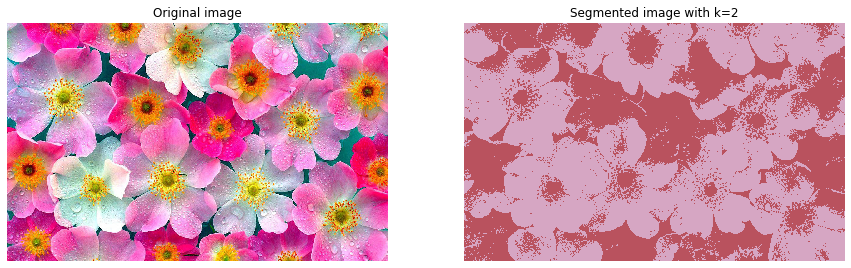

In [80]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

# Clustering for k=4

In [60]:
n_clusters = 4
kmeans = KMeans(n_clusters).fit(pixels)

### Determine label of each pixel

In [61]:
c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = kmeans.labels_ 

In [62]:
c.head(3)

,R,G,B,label
0,241,220,251,3
1,229,208,239,3
2,217,196,227,3


### Map each pixel to its center

In [63]:
centers_map_R = {i:kmeans.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:kmeans.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:kmeans.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

In [64]:
c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,241,220,251,3,212.509249,173.333702,200.425288
1,229,208,239,3,212.509249,173.333702,200.425288
2,217,196,227,3,212.509249,173.333702,200.425288


### Plot the clustered image

In [65]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

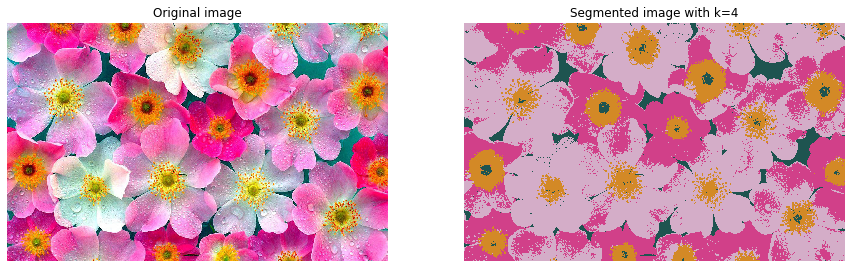

In [66]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

# Use the Elbow method to find the optimum k value for this image

In [86]:
# a list of within-cluster sum of squares (WCSS) for each clustering solution
wcss =[]
k_range = range(2, 17)
for k in k_range:
    kmeans = KMeans(k)
    kmeans.fit(pixels)
    wcss.append(kmeans.inertia_)
    
wcss

[10235127393.782234, 8012986947.911106, 5972144787.553347]

### Plot the number of clusters vs WCSS

Text(0, 0.5, 'WCSS')

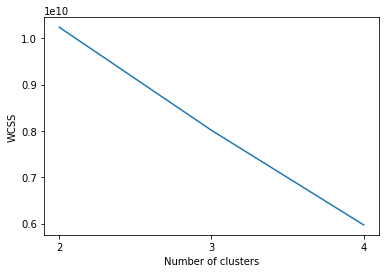

In [88]:
plt.plot(k_range, wcss)
plt.xticks(k_range)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
def clustering_error(samples, k):
    print('k:', k)
    clf = KMeans(k, max_iterations=2)
    clf.fit(pixels)
    return np.sum(np.linalg.norm(point - clf.predict_center(point)) for point in samples)
    

In [ ]:
if __name__ == "__main__":
    
    img_file = "sample.jpg"
    img = mpimg.imread(img_file)
    pixels = [pixel for row in img for pixel in row]

    clf = KMeans(k=2, max_iterations=2)
    clf.fit(pixels)

    new_img = [[clf.predict_center(pixel) for pixel in row] for row in img]
    new_img = np.array(new_img, np.uint8)

    plt.imshow(new_img)
    plt.axis('off')
    plt.show()

    # ks = range(2, 17)
    # errors = [clustering_error(pixels, k) for k in ks]
    # plt.plot(ks, errors)
    # plt.xticks(ks)
    # plt.xlabel("k")
    # plt.ylabel("Total squared error")
    # plt.title("Total Error vs. # of Clusters")
    # plt.show()
